## Model Selection : Underfitting, Overfitting

In [23]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

$$ y = 5 + 1.2*x -3.4*x^2 + 5.6*x^3 + ... $$

In [24]:

'''
labels = y; 
poly_features = x and its poly featues
true_w = coefficients
features = random variable '''

max_degrees = 20
n_train, n_test = 100, 100 
true_w = np.zeros(max_degrees)  # Allocate lots of space
true_w[:4] = [5, 1.2, -3.4, 5.6]  # 

features = np.random.normal(size = (n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degrees).reshape(1, -1))
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)


In [25]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [tf.constant(x, dtype=
    tf.float32) for x in [true_w, features, poly_features, labels]]

In [26]:
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

def load_data(data, batch_size, is_train = False):
    dataset = tf.data.Dataset.from_tensor_slices(data)
    dataset = dataset.shuffle(buffer_size= 100)
    dataset = dataset.batch(batch_size)
    return dataset

net = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## Building Normal Fitting (3rd Order Polynomial)

In [42]:
num_epochs, batch_size, lr = 50, 10, 0.05


optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

net = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

data_iter = load_data((poly_features[:n_train, :4], labels[:n_train]), batch_size, is_train = True)
training_loss = []
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            yhat = net(X)
            mse_loss = loss(yhat, y)
        
        grads = tape.gradient(mse_loss, net.trainable_variables)

        optimizer.apply_gradients(zip(grads, net.trainable_variables))

    epoch_loss = loss(net(poly_features[:n_train, :4]), labels[:n_train])
    training_loss.append(epoch_loss)
    print(f"epoch : {epoch}, training_loss : {epoch_loss}")

epoch : 0, training_loss : 490.5354309082031
epoch : 1, training_loss : 421.7524108886719
epoch : 2, training_loss : 368.8340148925781
epoch : 3, training_loss : 312.6621398925781
epoch : 4, training_loss : 262.5940246582031
epoch : 5, training_loss : 222.88475036621094
epoch : 6, training_loss : 185.66781616210938
epoch : 7, training_loss : 156.61898803710938
epoch : 8, training_loss : 133.21771240234375
epoch : 9, training_loss : 110.05538940429688
epoch : 10, training_loss : 91.99735260009766
epoch : 11, training_loss : 76.12255859375
epoch : 12, training_loss : 61.9316291809082
epoch : 13, training_loss : 50.57186508178711
epoch : 14, training_loss : 42.35611343383789
epoch : 15, training_loss : 34.32460021972656
epoch : 16, training_loss : 28.032285690307617
epoch : 17, training_loss : 23.454124450683594
epoch : 18, training_loss : 20.195005416870117
epoch : 19, training_loss : 17.470544815063477
epoch : 20, training_loss : 15.255690574645996
epoch : 21, training_loss : 13.5439815

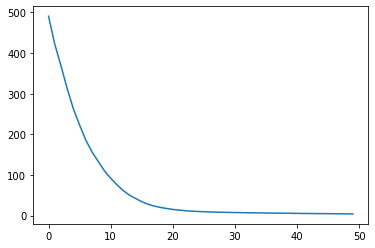

In [43]:
plt.plot(range(num_epochs), training_loss)

In [44]:
loss(net(poly_features[n_train:, :4]), labels[n_train:])

<tf.Tensor: shape=(), dtype=float32, numpy=5.0580416>

## Build Underfit Model (1st Deg Polyomial)

In [45]:

net = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

num_epochs, batch_size, lr = 50, 10, 0.05

data_iter = load_data((poly_features[:n_train, :1], labels[:n_train]), batch_size, is_train = True)
training_loss = []
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            yhat = net(X)
            mse_loss = loss(yhat, y)
        
        grads = tape.gradient(mse_loss, net.trainable_variables)

        optimizer.apply_gradients(zip(grads, net.trainable_variables))

    epoch_loss = loss(net(poly_features[:n_train, :1]), labels[:n_train])
    training_loss.append(epoch_loss)
    print(f"epoch : {epoch}, training_loss : {epoch_loss}")

epoch : 0, training_loss : 546.1493530273438
epoch : 1, training_loss : 545.220703125
epoch : 2, training_loss : 544.6514282226562
epoch : 3, training_loss : 544.2748413085938
epoch : 4, training_loss : 543.8222045898438
epoch : 5, training_loss : 543.5359497070312
epoch : 6, training_loss : 543.0966186523438
epoch : 7, training_loss : 542.8233032226562
epoch : 8, training_loss : 542.708251953125
epoch : 9, training_loss : 542.6119384765625
epoch : 10, training_loss : 542.6213989257812
epoch : 11, training_loss : 542.5575561523438
epoch : 12, training_loss : 542.5348510742188
epoch : 13, training_loss : 542.5260620117188
epoch : 14, training_loss : 542.506103515625
epoch : 15, training_loss : 542.4821166992188
epoch : 16, training_loss : 542.48291015625
epoch : 17, training_loss : 542.4754028320312
epoch : 18, training_loss : 542.470703125
epoch : 19, training_loss : 542.462646484375
epoch : 20, training_loss : 542.4767456054688
epoch : 21, training_loss : 542.4776000976562
epoch : 22,

In [46]:
loss(net(poly_features[n_train:, :1]), labels[n_train:])

<tf.Tensor: shape=(), dtype=float32, numpy=472.63507>

## Build Overfit Model (8th Deg Polyomial)

In [47]:

net = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

num_epochs, batch_size, lr = 50, 10, 0.05

data_iter = load_data((poly_features[:n_train, :], labels[:n_train]), batch_size, is_train = True)
training_loss = []
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            yhat = net(X)
            mse_loss = loss(yhat, y)
        
        grads = tape.gradient(mse_loss, net.trainable_variables)

        optimizer.apply_gradients(zip(grads, net.trainable_variables))

    epoch_loss = loss(net(poly_features[:n_train, :]), labels[:n_train])
    training_loss.append(epoch_loss)
    print(f"epoch : {epoch}, training_loss : {epoch_loss}")

epoch : 0, training_loss : 3300252188672.0
epoch : 1, training_loss : 320698974208.0
epoch : 2, training_loss : 155972141056.0
epoch : 3, training_loss : 93067010048.0
epoch : 4, training_loss : 20524584960.0
epoch : 5, training_loss : 439203201024.0
epoch : 6, training_loss : 123312119808.0
epoch : 7, training_loss : 8233865728.0
epoch : 8, training_loss : 40184811520.0
epoch : 9, training_loss : 26298054656.0
epoch : 10, training_loss : 17092548608.0
epoch : 11, training_loss : 72190672896.0
epoch : 12, training_loss : 170609442816.0
epoch : 13, training_loss : 16988925952.0
epoch : 14, training_loss : 8570759168.0
epoch : 15, training_loss : 18510536704.0
epoch : 16, training_loss : 29668943872.0
epoch : 17, training_loss : 4102684672.0
epoch : 18, training_loss : 3039508224.0
epoch : 19, training_loss : 538254278656.0
epoch : 20, training_loss : 30825093120.0
epoch : 21, training_loss : 758166272.0
epoch : 22, training_loss : 54551142400.0
epoch : 23, training_loss : 80240001024.0


In [48]:
loss(net(poly_features[n_train:, :]), labels[n_train:])

<tf.Tensor: shape=(), dtype=float32, numpy=4121011700000.0>